Fit interpretable models to the training set and test on validation sets.

In [ ]:
# cd drive/MyDrive/stat215_project/rule-vetting/

In [ ]:
# pip install -e .

In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pickle as pkl
from os.path import join as oj

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import imodels
from rulevetting.api import validation
from rulevetting.projects.csi_pecarn.dataset import Dataset

MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df_train, df_tune, _ = Dataset().get_data()
X_train = df_train.drop(columns=outcome_def)
y_train = df_train[outcome_def].values
X_tune = df_tune.drop(columns=outcome_def)
y_tune = df_tune[outcome_def].values
processed_feats = df_train.keys().values.tolist()
feature_names = processed_feats

def predict_and_save(model, model_name='decision_tree'):
    '''Plots cv and returns cv, saves all stats
    '''
    results = {'model': model}
    for x, y, suffix in zip([X_train, X_tune],
                            [y_train, y_tune],
                            ['_train', '_tune']):
        stats, threshes = validation.all_stats_curve(y, model.predict_proba(x)[:, 1],
                                                     plot=suffix == '_tune')
        for stat in stats.keys():
            results[stat + suffix] = stats[stat]
        results['threshes' + suffix] = threshes
    pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
    return stats, threshes

kwargs {'clean_data': {}, 'preprocess_data': {'frac_missing_allowed': 0.05}, 'extract_features': {'drop_negative_columns': False}}


# fit simple models

**decision tree**

100%|██████████| 6/6 [00:00<00:00, 759.10it/s]


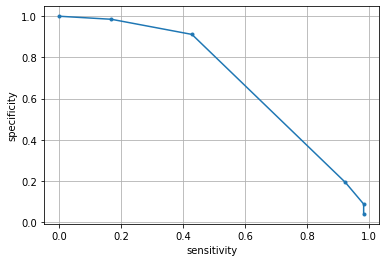

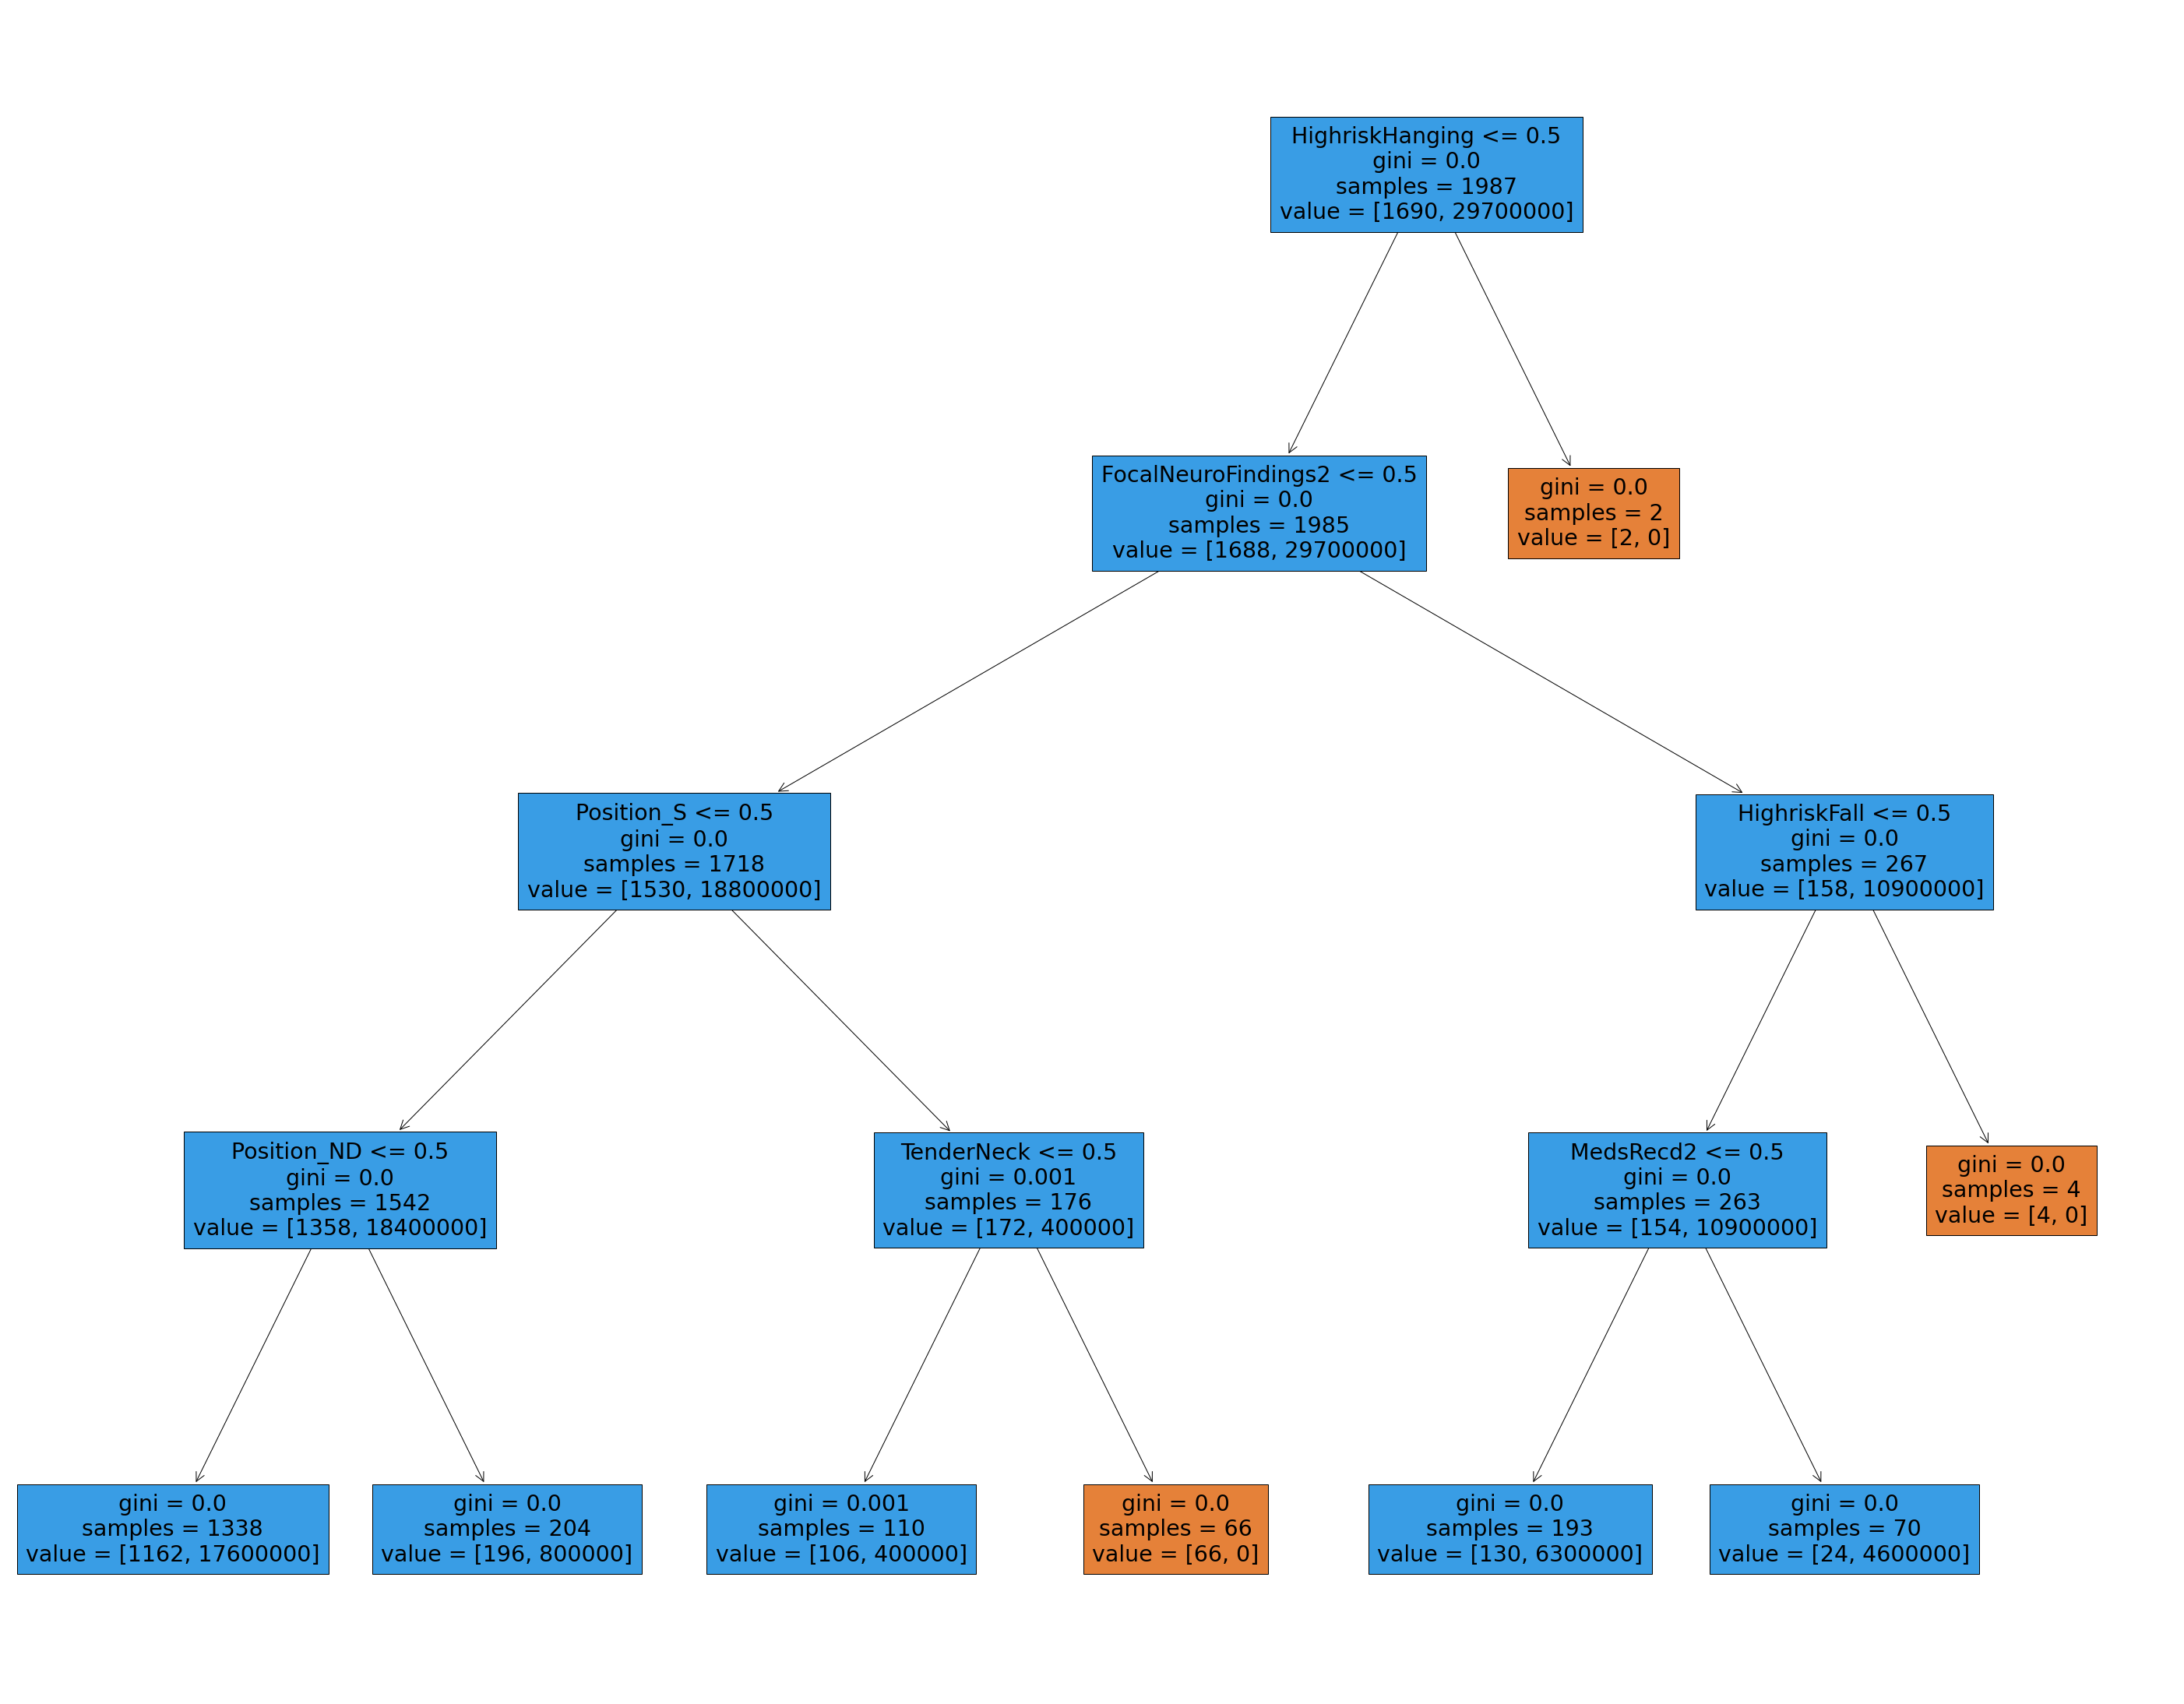

In [28]:
# fit decition tree
dt = DecisionTreeClassifier(max_depth=4, class_weight={0: 1, 1: 1e5})
dt.fit(X_train, y_train)
stats, threshes = predict_and_save(dt, model_name='decision_tree')
# plt.xlim((0.8, 1.0))
# plt.ylim((0.5, 1.0))
plt.show()

fig = plt.figure(figsize=(50, 40))
plot_tree(dt, feature_names=feature_names, filled=True)
plt.show()

**rulefit**

100%|██████████| 63/63 [00:00<00:00, 1104.05it/s]


'\ndef print_best(sens, spec):\n    idxs = np.array(sens) > 0.9\n    print(np.array(sens)[idxs], np.array(spec)[idxs])\nprint_best(sens, spec)\n'

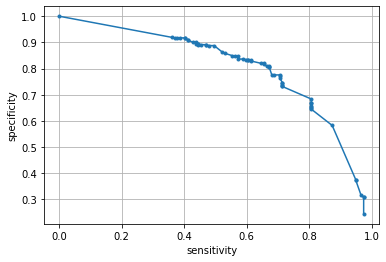

In [29]:
# fit a rulefit model
np.random.seed(13)
rulefit = imodels.RuleFitRegressor(max_rules=10,tree_size=5)
rulefit.fit(X_train, y_train, feature_names=feature_names)

# preds = rulefit.predict(X_test)
stats, threshes = predict_and_save(rulefit, model_name='rulefit')
'''
def print_best(sens, spec):
    idxs = np.array(sens) > 0.9
    print(np.array(sens)[idxs], np.array(spec)[idxs])
print_best(sens, spec)
'''

In [30]:
# pd.reset_option('display.max_colwidth')
rulefit.visualize()

,rule,coef
53,SubInj_TorsoTrunk <= 0.5 and FocalNeuroFindings2 <= 0.5 and Torticollis2 <= 0.5,-0.00
52,HighriskDiving <= 0.5 and Torticollis2 <= 0.5 and FocalNeuroFindings <= 0.5 and Immobilization2 <= 0.5,-0.02
56,HighriskDiving <= 0.5 and Torticollis2 <= 0.5 and FocalNeuroFindings <= 0.5 and Immobilization2 <= 0.5,-0.00
55,HighriskDiving <= 0.5 and FocalNeuroFindings <= 0.5 and subinj_TorsoTrunk2 <= 0.5 and Immobilization2 <= 0.5,-0.04
49,FocalNeuroFindings <= 0.5 and MedsRecd2 <= 0.5 and Torticollis <= 0.5,-0.05
50,Predisposed <= 0.5 and HighriskMVC <= 0.5 and axialloadtop <= 0.5 and FocalNeuroFindings2 <= 0.5,-0.01
54,FocalNeuroFindings <= 0.5 and subinj_TorsoTrunk2 <= 0.5 and MedsRecd2 <= 0.5,-0.00
47,HighriskMVC <= 0.5 and FocalNeuroFindings <= 0.5 and is_ems > 0.5,-0.00
51,HighriskMVC <= 0.5 and FocalNeuroFindings <= 0.5 and is_ems > 0.5,-0.01
48,AlteredMentalStatus <= 0.5 and Clotheslining <= 0.5 and PainNeck2 <= 0.5 and Torticollis2 <= 0.5 and FocalNeuroFindings <= 0.5,-0.03


**greedy (CART) rule list**

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 10/10 [00:00<00:00, 938.81it/s]


mean 0.149 (1987 pts)
if FocalNeuroFindings >= 1.0 then 0.469 (192 pts)
mean 0.115 (1795 pts)
if feat 41 >= 1.0 then 0.27 (296 pts)
mean 0.085 (1499 pts)
if feat 39 >= 1.0 then 0.304 (69 pts)
mean 0.074 (1430 pts)
if feat 31 >= 1.0 then 0.228 (79 pts)
mean 0.065 (1351 pts)
if feat 27 >= 1.0 then 0.206 (68 pts)
mean 0.058 (1283 pts)
if feat 13 >= 1.0 then 0.5 (6 pts)
mean 0.056 (1277 pts)
if feat 0 >= 1.0 then 0.118 (186 pts)
mean 0.045 (1091 pts)
if feat 24 >= 1.0 then 0.083 (424 pts)
mean 0.021 (667 pts)
if feat 12 >= 1.0 then 0.167 (6 pts)
mean 0.02 (661 pts)
if feat 17 >= 1.0 then 0.049 (102 pts)



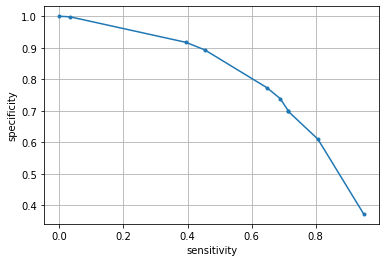

In [31]:
class_weight = {0: 1, 1: 1000}
d = imodels.GreedyRuleListClassifier(max_depth=10, class_weight=class_weight, criterion='neg_corr')
d.fit(X_train, y_train, feature_names=feature_names, verbose=False)
stats, threshes = predict_and_save(d, model_name='grl')
# d.print_list()
print(d)

**gosdt**

It is hard to get large sensitivity.


In [ ]:
# GOSDT = imodels.OptimalTreeClassifier(regularization=0.1,uncertainty_tolerance=0.5, upperbound=0.5, model_limit=3,)
# GOSDT.fit(X_train, y_train)

# def predict_and_save_GOSDT(model, model_name='GOSDT'):
#     '''Plots cv and returns cv, saves all stats
#     '''
#     results = {'model': model}
#     def predict_proba(x):
#       preds = model.predict(x)
#       return np.vstack((1 - preds, preds)).transpose()
#     for x, y, suffix in zip([X_train, X_tune],
#                             [y_train, y_tune],
#                             ['_train', '_tune']):
#         stats, threshes = validation.all_stats_curve(y, predict_proba(x)[:, 1],
#                                                      plot=suffix == '_tune')
#         for stat in stats.keys():
#             results[stat + suffix] = stats[stat]
#         results['threshes' + suffix] = threshes
#     pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
#     return stats, threshes

# stats, threshes = predict_and_save_GOSDT(GOSDT, model_name='GOSDT')
# print(GOSDT)

**SkopeRules**

100%|██████████| 91/91 [00:00<00:00, 1603.74it/s]


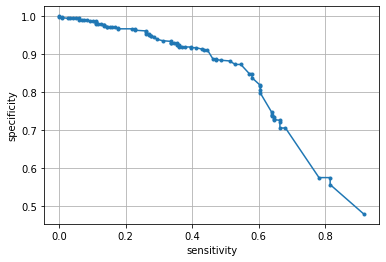

In [32]:
Skope = imodels.SkopeRulesClassifier(precision_min=0.01, recall_min=0.01, n_estimators=13, max_samples=0.8,bootstrap=True)
Skope.fit(X_train, y_train)
stats, threshes = predict_and_save(Skope, model_name='SkopeRules')

**BoostedRules**



100%|██████████| 91/91 [00:00<00:00, 1698.20it/s]


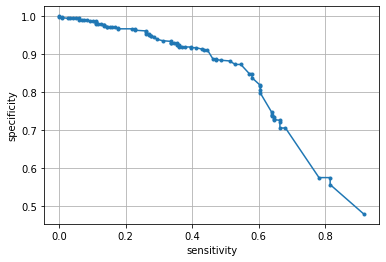

In [33]:
Boost = imodels.BoostedRulesClassifier(n_estimators=10,)
Boost.fit(X_train, y_train)
stats, threshes = predict_and_save(Skope, model_name='BoostedRules')

**OptimalRule**

It is hard to get large sensitivity.

In [ ]:
# OR = imodels.OptimalRuleListClassifier(c=0.0, n_iter=100000,ablation=0,policy='objective', max_card=2, min_support=0.001, random_state=0)
# OR.fit(X_train, y_train)
# stats, threshes = predict_and_save(OR, model_name='OptimalRule')

# look at all the results

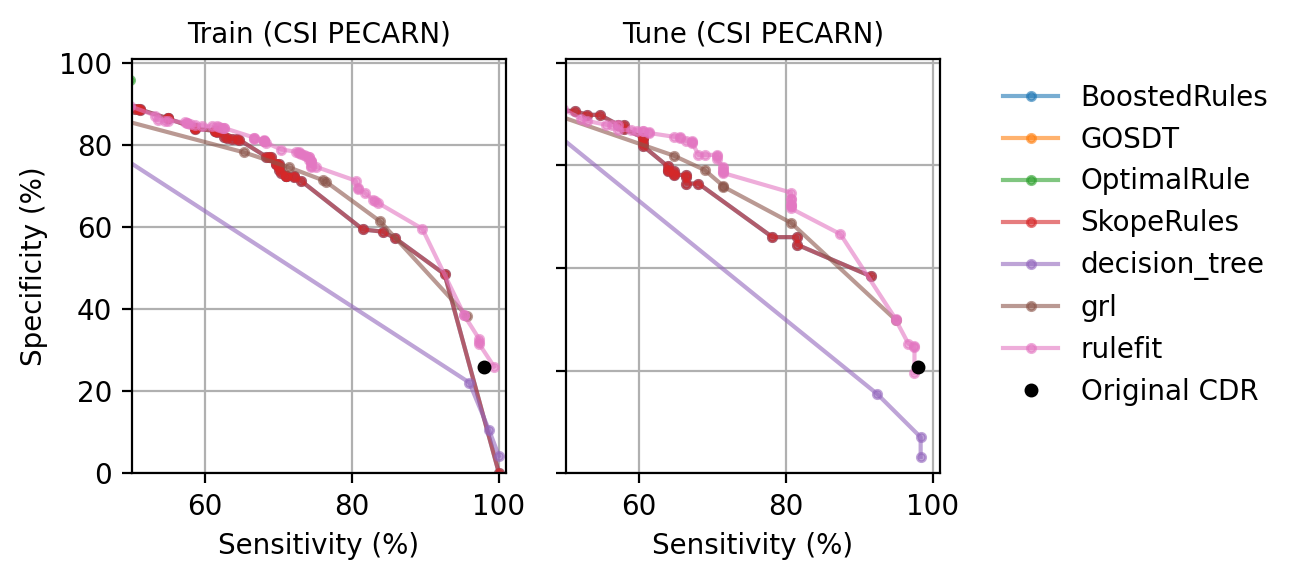

In [35]:
def plot_metrics(suffix, title=None, fs=15):
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                #         print(r)
                #                 print(r.keys())

                threshes = np.array(r['threshes' + suffix])
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                plt.plot(100 * sens, 100 * spec, 'o-', label=fname[:-4], alpha=0.6, markersize=3)
                plt.xlabel('Sensitivity (%)', fontsize=fs)
                plt.ylabel('Specificity (%)', fontsize=fs)
                s = suffix[1:]
                if title is None:
                    plt.title(f'{s}\n{data_sizes[s][0]} IAI-I / {data_sizes[s][1]}')
                else:
                    plt.title(title, fontsize=fs)

                # print best results
                if suffix == '_test2':
                    idxs = (sens > 0.95) & (spec > 0.43)
                    if np.sum(idxs) > 0:
                        idx_max = np.argmax(spec[idxs])
                        print(fname, f'{100 * sens[idxs][idx_max]:0.2f} {100 * spec[idxs][idx_max]:0.2f}')

    # if suffix == '_test2':
    #     plt.plot(96.77, 43.98, 'o', color='black', label='Original CDR', ms=4)
    # else:
    plt.plot(98, 26, 'o', color='black', label='Original CDR', ms=4)
    plt.grid()


suffixes = ['_train', '_tune'] 
titles = ['Train (CSI PECARN)', 'Tune (CSI PECARN)']
R, C = 1, len(suffixes)
plt.figure(dpi=200, figsize=(C * 2.5, R * 3), facecolor='w')
fs = 10
for i, suffix in enumerate(suffixes):
    ax = plt.subplot(R, C, i + 1)
    plot_metrics(suffix, title=titles[i], fs=fs)
    if i > 0:
        plt.ylabel('')
        plt.yticks([0, 25, 50, 75, 100], labels=[''] * 5)
    plt.xlim((50, 101))
    plt.ylim((0, 101))
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=fs, frameon=False)
#plt.savefig('figs/metrics_3_splits')
plt.show()

100%|██████████| 63/63 [00:00<00:00, 1042.96it/s]


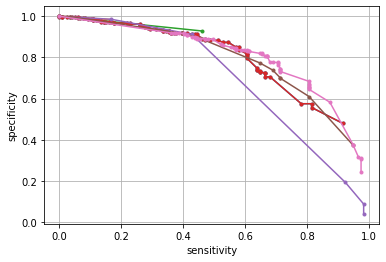

In [36]:
def print_metrics(suffix):
    vals = {s: [] for s in ['sens', 'spec', 'ppv', 'npv', 'lr+', 'lr-', 'brier_score', 'f1']}
    fnames = []
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                threshes = np.array(r['threshes' + suffix])
                m = r['model']

                # add more stats
                for x, y, suff in zip([X_train, X_tune],
                                      [y_train, y_tune],
                                      ['_train', '_tune']):
                    if suff == suffix:
                        stats, threshes = validation.all_stats_curve(y, m.predict_proba(x)[:, 1],
                                                                     plot=suffix == '_tune')
                        preds_proba = m.predict_proba(x)[:, 1]
                        brier_score = metrics.brier_score_loss(y, preds_proba)

                # pick best vals
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                best_idx = np.argmax(5 * sens + spec)
                for k in vals.keys():
                    if not k == 'brier_score':
                        #                         print('k', k)
                        vals[k].append(stats[k][best_idx])
                vals['brier_score'].append(brier_score)
                fnames.append(fname[:-4])
    stats = pd.DataFrame.from_dict(vals)
    stats.index = fnames
    return (stats).round(2).transpose()


suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix)

In [37]:
stats_list['_train']

,BoostedRules,GOSDT,OptimalRule,SkopeRules,decision_tree,grl,rulefit
sens,0.93,0.15,0.50,0.93,1.00,0.96,0.99
spec,0.49,0.99,0.96,0.49,0.04,0.38,0.26
ppv,0.24,0.66,0.68,0.24,0.16,0.21,0.19
npv,0.97,0.87,0.92,0.97,1.00,0.98,1.00
lr+,1.80,10.91,12.03,1.80,1.04,1.55,1.34
lr-,0.15,0.86,0.52,0.15,0.00,0.11,0.03
brier_score,0.12,0.14,0.11,0.12,0.81,0.11,0.15
f1,0.38,0.25,0.57,0.38,0.27,0.35,0.32


In [ ]:
stats_list['_tune']

,BoostedRules,GOSDT,OptimalRule,SkopeRules,decision_tree,grl,rulefit
sens,0.97,0.17,0.46,0.97,0.98,0.95,0.95
spec,0.25,0.98,0.93,0.25,0.09,0.37,0.52
ppv,0.22,0.69,0.59,0.22,0.19,0.25,0.30
npv,0.98,0.84,0.89,0.98,0.96,0.97,0.98
lr+,1.30,10.16,6.45,1.30,1.08,1.51,1.99
lr-,0.10,0.85,0.58,0.10,0.19,0.14,0.10
brier_score,0.15,0.16,0.16,0.15,0.79,0.12,0.16
f1,0.36,0.27,0.52,0.36,0.32,0.39,0.46
